In [1]:
%matplotlib inline

import seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("average.csv")

In [3]:
data

,ID,gender,dir,degree,average
0,104308013,1,1,1,929.17460
1,104308013,1,1,2,1381.90830
2,104308013,1,1,3,1887.43590
3,104308013,1,1,4,1813.58880
4,104308013,1,2,1,1565.84510
...,...,...,...,...,...
363,107702056,1,1,4,1735.59900
364,107702056,1,2,1,1167.80020
365,107702056,1,2,2,1265.74235
366,107702056,1,2,3,1510.41480


In [4]:
data.describe()

,ID,gender,dir,degree,average
count,3.680000e+02,368.000000,368.000000,368.000000,368.000000
mean,1.070439e+08,1.652174,1.500000,2.500000,1678.932559
std,9.807958e+05,0.476929,0.500681,1.119556,524.573234
min,1.043080e+08,1.000000,1.000000,1.000000,614.457800
25%,1.062090e+08,1.000000,1.000000,1.750000,1291.883900
50%,1.077020e+08,2.000000,1.500000,2.500000,1693.468150
75%,1.077020e+08,2.000000,2.000000,3.250000,2079.860250
max,1.077021e+08,2.000000,2.000000,4.000000,3052.426200


In [5]:
data = data.drop("ID", axis=1)

# 單變量分析

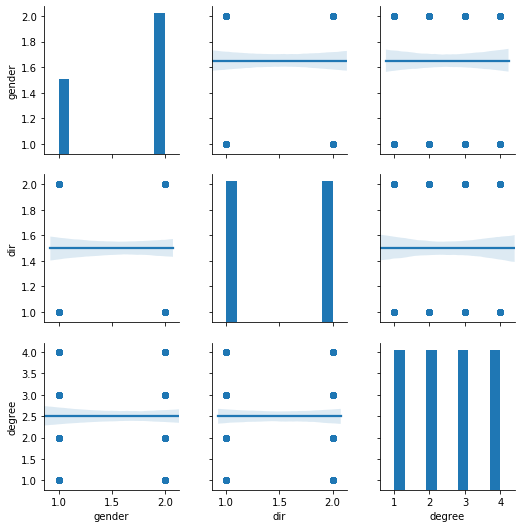

In [6]:
seaborn.pairplot(data, vars=['gender', 'dir', 'degree'], kind='reg')

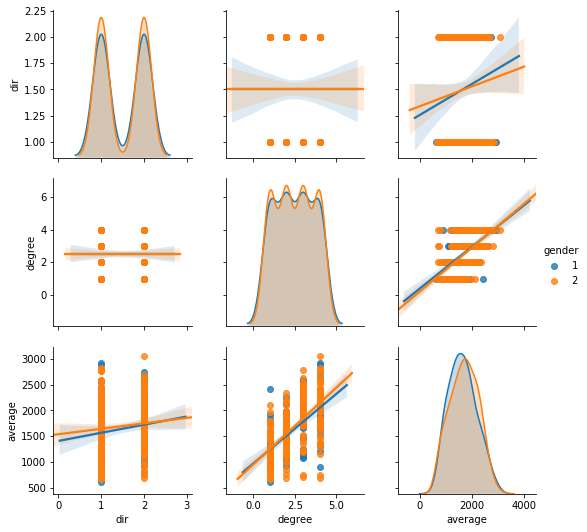

In [7]:
seaborn.pairplot(data, vars=['dir', 'degree', 'average'], kind='reg', hue='gender')

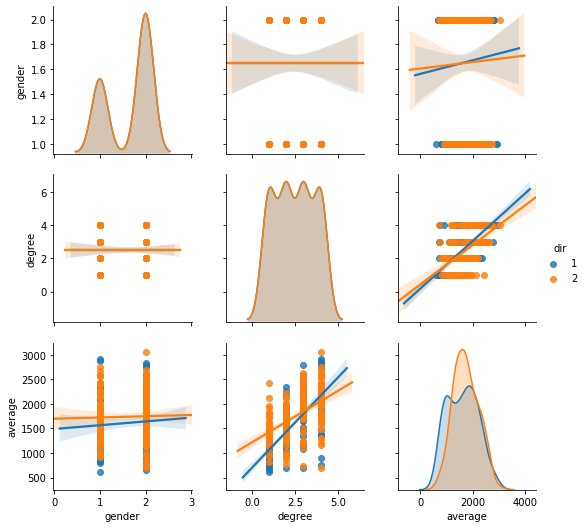

In [8]:
seaborn.pairplot(data, vars=['gender', 'degree', 'average'], kind='reg', hue='dir')

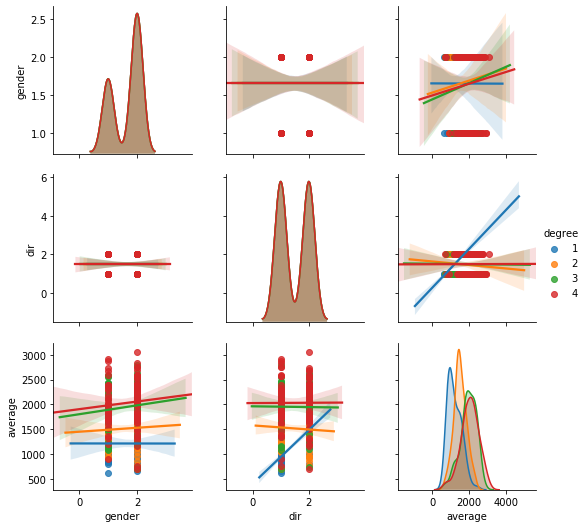

In [9]:
seaborn.pairplot(data, vars=['gender', 'dir', 'average'], kind='reg', hue='degree')

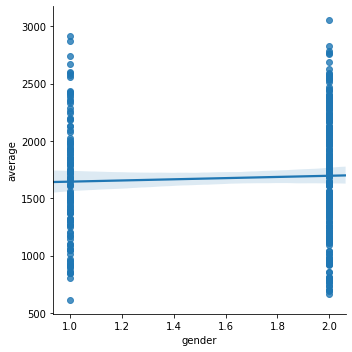

In [10]:
seaborn.lmplot(y='average', x='gender', data=data)

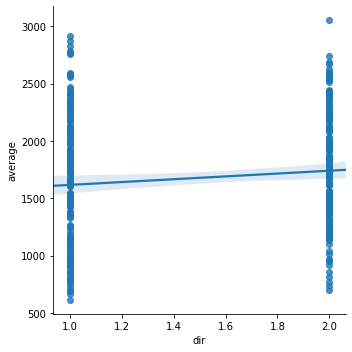

In [11]:
seaborn.lmplot(y='average', x='dir', data=data)

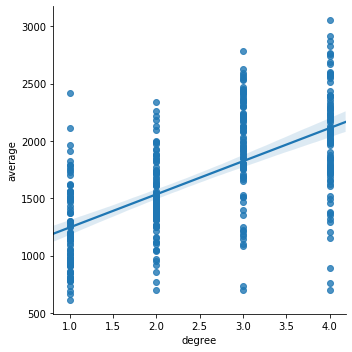

In [12]:
seaborn.lmplot(y='average', x='degree', data=data)

In [13]:
data.groupby("gender").mean()

,dir,degree,average
gender,,,
1,1.5,2.5,1645.410358
2,1.5,2.5,1696.811066


In [14]:
data.groupby("dir").mean()

,gender,degree,average
dir,,,
1,1.652174,2.5,1617.047645
2,1.652174,2.5,1740.817473


In [15]:
data.groupby("degree").mean()

,gender,dir,average
degree,,,
1,1.652174,1.5,1214.353349
2,1.652174,1.5,1516.924057
3,1.652174,1.5,1951.593887
4,1.652174,1.5,2032.858942


# 多變量分析（ANOVA）

In [16]:
data.groupby(["gender", "dir", "degree"]).mean()

average
gender dir degree             
1      1   1        935.705319
           2       1520.845587
           3       1853.246300
           4       1956.454169
       2   1       1493.735625
           2       1461.138538
           3       1933.332706
           4       2008.824619
2      1   1        948.094917
           2       1546.501977
           3       2009.974237
           4       2071.320357
       2   1       1480.220183
           2       1515.006930
           3       1955.404880
           4       2047.965047

In [17]:
import statsmodels.stats.anova as anova
from statsmodels.formula.api import ols

In [18]:
model = ols("average ~ gender + dir + degree", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     79.76
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.13e-39
Time:                        06:03:19   Log-Likelihood:                -2733.3
No. Observations:                 368   AIC:                             5475.
Df Residuals:                     364   BIC:                             5490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.8083    110.895      6.184      0.0

In [19]:
print(anova.anova_lm(model))

             df        sum_sq       mean_sq           F        PR(>F)
gender      1.0  2.205523e+05  2.205523e+05    1.317476  2.517993e-01
dir         1.0  1.409345e+06  1.409345e+06    8.418770  3.939515e-03
degree      1.0  3.842462e+07  3.842462e+07  229.530727  1.511188e-40
Residual  364.0  6.093547e+07  1.674051e+05         NaN           NaN


In [20]:
model = ols("average ~ C(gender) + C(dir) + C(degree)", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     52.11
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.22e-40
Time:                        06:03:19   Log-Likelihood:                -2726.5
No. Observations:                 368   AIC:                             5465.
Df Residuals:                     362   BIC:                             5489.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1118.9462     55.051     20.

In [21]:
print(anova.anova_lm(model))

              df        sum_sq       mean_sq          F        PR(>F)
C(gender)    1.0  2.205523e+05  2.205523e+05   1.359562  2.443810e-01
C(dir)       1.0  1.409345e+06  1.409345e+06   8.687702  3.411347e-03
C(degree)    3.0  4.063536e+07  1.354512e+07  83.496905  4.477060e-41
Residual   362.0  5.872473e+07  1.622230e+05        NaN           NaN
